In [40]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('recipe.db')
import matplotlib as plt

In [9]:
sql = '''SELECT R.tag_value, S.tag_value 
         FROM recipe R 
         JOIN recipe_step RS ON R.ID = RS.recipe_id
         JOIN step S ON RS.step_id = S.ID
         WHERE R.tag_value LIKE '%tomato%' 
         AND R.tag_value LIKE '%soup%'
         ;'''

df_tomato_soup_steps = pd.read_sql(sql, conn)
print("steps")
print(df_tomato_soup_steps)

steps
                          tag_value  \
0      pepper and tomato cream soup   
1      pepper and tomato cream soup   
2      pepper and tomato cream soup   
3      pepper and tomato cream soup   
4      pepper and tomato cream soup   
...                             ...   
13035      my homestyle tomato soup   
13036      my homestyle tomato soup   
13037      my homestyle tomato soup   
13038      my homestyle tomato soup   
13039      my homestyle tomato soup   

                                               tag_value  
0      in a wide-bottomed saucepan, add tomatoes and ...  
1                            cook until peppers are limp  
2       add broth and simmer slowly for about 10 minutes  
3      stir in milk, add salt and hot pepper seasonin...  
4         mix cheese into the soup and serve immediately  
...                                                  ...  
13035                                             season  
13036  cook celery, onion, and green pepper in 1 cup 

In [55]:
sql = '''SELECT R.ID, R.tag_value, N.tag_value 
         FROM recipe R 
         JOIN recipe_ner RN ON R.ID = RN.recipe_id
         JOIN ner N ON RN.ner_id = N.ID
         WHERE R.tag_value LIKE '%tomato%' 
         AND R.tag_value LIKE '%soup%'
         ;'''

df_tomato_soup_ner = pd.read_sql(sql, conn)


print("ingredients")
print(df_tomato_soup_ner.iloc[:,2:3])

ingredients
                     tag_value
0                         milk
1                       cheese
2           green bell peppers
3                         salt
4      liquid hot pepper sauce
...                        ...
13044             green pepper
13045                     salt
13046                   celery
13047                 tomatoes
13048                    onion

[13049 rows x 1 columns]


In [56]:
freq = df_tomato_soup_ner.iloc[:,2:3].value_counts().nlargest(30)

In [57]:
freq

tag_value             
tomatoes                  886
salt                      737
garlic                    674
onion                     503
olive oil                 415
water                     295
basil                     274
sugar                     260
butter                    244
chicken broth             228
celery                    190
fresh basil               170
thyme                     169
pepper                    162
onions                    158
tomato paste              149
milk                      135
carrots                   132
parsley                   131
flour                     127
carrot                    110
heavy cream               105
chicken                   104
oregano                   101
tomato soup               100
chicken stock              96
black pepper               93
extra virgin olive oil     88
parmesan cheese            87
extravirgin olive oil      84
dtype: int64

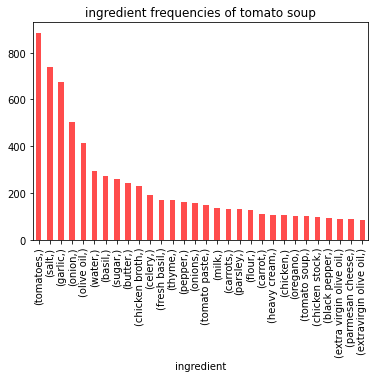

In [115]:
freq.plot(kind="bar", title = "ingredient frequencies of tomato soup", xlabel = 'ingredient', color = 'red', alpha=0.7);

In [92]:
df_tomato_soup_ner.head()

,ID,tag_value,tag_value
0,REC_1015,pepper and tomato cream soup,milk
1,REC_1015,pepper and tomato cream soup,cheese
2,REC_1015,pepper and tomato cream soup,green bell peppers
3,REC_1015,pepper and tomato cream soup,salt
4,REC_1015,pepper and tomato cream soup,liquid hot pepper sauce


In [90]:
# add column count to recipe table
df = df_tomato_soup_ner.copy()
recipe_count = df.groupby(by="ID").count()
recipe_count = recipe_count.iloc[:,1:2].reset_index().rename(columns = {'tag_value':'count'})
dfc = df_tomato_soup_ner.merge(recipe_count, left_on='ID', right_on='ID')

In [97]:
rc = recipe_count.drop_duplicates(subset = 'ID')

In [103]:
rc.describe()

,count
count,1265.000000
mean,10.315415
std,3.655578
min,2.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,43.000000


<AxesSubplot:title={'center':'tomato soup ingredients frequencies'}, xlabel='Frequency', ylabel='number of ingredients'>

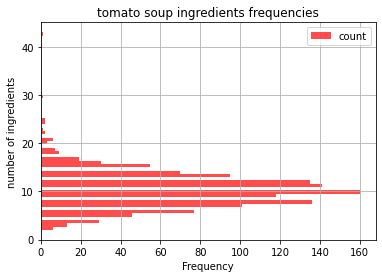

In [124]:
rc.plot(kind='hist',
        alpha=0.7,
        bins=60,
        title='tomato soup ingredients frequencies',
        grid=True,
        orientation='horizontal',
        color=['red'],
        ylabel = "number of ingredients")